# Select the Right Threshold values using ROC Curve
### this is for every classification model automated function for roc and auc

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [55]:
from sklearn.model_selection import train_test_split  
# making dataframe by our self
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [56]:
X.shape

(2000, 20)

In [57]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [35]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9828722222222223


In [36]:
ytrain_pred # change it in dataframe if you are not understand

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.28, 0.72]])

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### Now we will focus on selecting the best threshold for maximum accuracy

In [45]:
pred=[]
#for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:  # for all algorithems
for model in [ log_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9885777777777777


In [46]:
pd.concat(pred,axis=1)

,0
0,0.991861
1,0.000008
2,0.966929
3,0.761539
4,0.779443
...,...
595,0.024239
596,0.000003
597,0.984385
598,0.001147


In [47]:
final_prediction

0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64

In [48]:
#### Calculate the ROc Curve   #FPR = false positive rate # TPR = true positive rate


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99970150e+00, 9.99701500e-01, 9.96158877e-01, 9.96129645e-01,
       9.47070326e-01, 9.46204924e-01, 8.65466258e-01, 8.63536252e-01,
       8.53176377e-01, 8.50056757e-01, 8.41421435e-01, 8.39367909e-01,
       8.15506733e-01, 8.14031083e-01, 7.10421057e-01, 6.95370907e-01,
       6.71015565e-01, 6.37604614e-01, 6.28000190e-01, 6.25419393e-01,
       5.85991638e-01, 5.72811301e-01, 5.44222421e-01, 5.09091565e-01,
       5.05747727e-01, 4.25206094e-01, 4.00497635e-01, 3.57672321e-01,
       3.57418343e-01, 3.08833885e-01, 3.04354181e-01, 2.98609914e-01,
       2.96733938e-01, 2.62534344e-01, 2.58894947e-01, 2.46055520e-01,
       2.13787155e-01, 8.32534990e-02, 8.12384385e-02, 5.22202002e-06,
       4.99437632e-06, 2.17237065e-07])

In [49]:
from sklearn.metrics import accuracy_score   # we can use threshold between 1 - 0
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
23,0.509092,0.966667
21,0.572811,0.965000
24,0.505748,0.965000
22,0.544222,0.965000
20,0.585992,0.963333


In [50]:
accuracy_ls

,thresholds,accuracy
23,5.090916e-01,0.966667
21,5.728113e-01,0.965000
24,5.057477e-01,0.965000
22,5.442224e-01,0.965000
20,5.859916e-01,0.963333
16,6.710156e-01,0.961667
17,6.376046e-01,0.961667
19,6.254194e-01,0.961667
25,4.252061e-01,0.960000
18,6.280002e-01,0.960000


In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

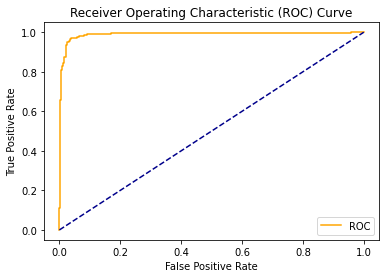

In [52]:
plot_roc_curve(fpr,tpr)

In [53]:
# the entire process is very simple just focus on code repeat if you not understand